## Briefing about Data

### What does this data contains?

The Airline Passenger Satisfaction folder comes with two csv files, `train.csv` and `test.csv`.

The datasets contains 23 different attributes about an airline passenger satisfaction survey. All these attributes gives us useful information about the passengers and how they rated the diffferent services of the flights.

What factors lead to customer satisfaction for an Airline?


###  What information do we get from this data?

The datasets contains 23 different attributes which are -

1. Gender: Gender of the passengers 
    * Male : Male Passenger
    * Female : Female Passenger
2. Customer Type: The customer type as per loyality and behaviour
    * Loyal Customer
    * Disloyal Customer
3. Age: The actual age of the passengers
    * In Range
4. Type of Travel: Purpose of the flight of the passengers
    * Personal Travel
    * Business Travel
5. Class: Travel class in the plane of the passengers
    * Eco : Economy Class
    * Eco Plus : Premium Economy Class
    * Business : Business Class
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service
    * 0 : Not Applicable
    * General Rating: 1-5
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
    * 0 : Not Applicable
    * General Rating: 1-5
9. Ease of Online booking: Satisfaction level of online booking
    * 0 : Not Applicable
    * General Rating: 1-5
10. Gate location: Satisfaction level of Gate location
    * 0 : Not Applicable
    * General Rating: 1-5
11. Food and drink: Satisfaction level of Food and drink
    * 0 : Not Applicable
    * General Rating: 1-5
12. Online boarding: Satisfaction level of online boarding
    * 0 : Not Applicable
    * General Rating: 1-5
13. Seat comfort: Satisfaction level of Seat comfort
    * 0 : Not Applicable
    * General Rating: 1-5
14. Inflight entertainment: Satisfaction level of inflight entertainment
    * 0 : Not Applicable
    * General Rating: 1-5
15. On-board service: Satisfaction level of On-board service
    * 0 : Not Applicable
    * General Rating: 1-5
16. Leg room service: Satisfaction level of Leg room service
    * 0 : Not Applicable
    * General Rating: 1-5
17. Baggage handling: Satisfaction level of baggage handling
    * 0 : Not Applicable
    * General Rating: 1-5
18. Check-in service: Satisfaction level of Check-in service
    * 0 : Not Applicable
    * General Rating: 1-5
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
    * 0 : Not Applicable
    * General Rating: 1-5
21. Departure Delay in Minutes: Minutes delayed when departure
    * In Continous Range (Minutes)
22. Arrival Delay in Minutes: Minutes delayed when Arrival
    * In Continous Range (Minutes)
23. Satisfaction: Airline satisfaction level ( Prediction Target )
    * Satisfaction (1) : Overall satisfied with the services
    * Neutral or Dissatisfaction (0) : Overall unsatisfied with the services


### Evaluation Criteria ?

If we can reach up to 95% accuracy at predicting whether or not a customer is satisfied with the airline services, then only we'll pursue for further application purpose.

1. Confusion Matrix
2. Classification Report
3. ROC Curve and AUC Value
4. Cross Validated Scores


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
df=pd.read_csv('./Data/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Exploration

In [3]:
df.shape

(103904, 25)

In [4]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


## Visualization

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

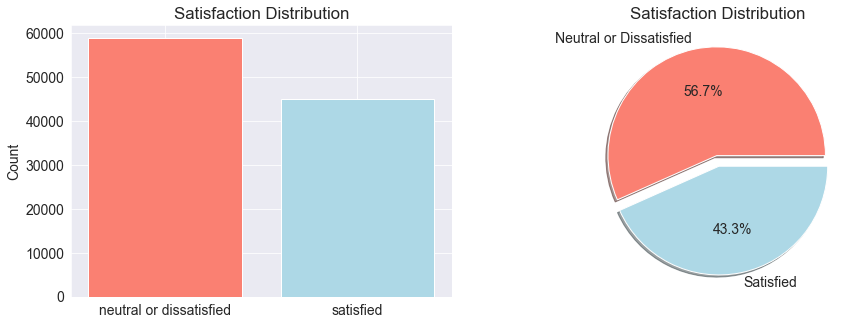

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(df["satisfaction"].value_counts().index, df["satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(df["satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

In [9]:
df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

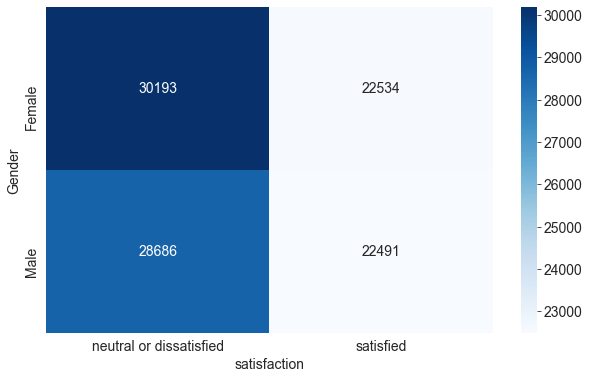

In [10]:
sns.heatmap(pd.crosstab(df['Gender'], df['satisfaction']),annot=True, cmap='Blues', cbar=True,fmt='d');


In [11]:
# Check the percentages
pd.crosstab(df['Gender'], df['satisfaction'], normalize=True)*100

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,29.058554,21.687327
Male,27.608177,21.645942


Here we can see that around 57% of passengers are not satisfied with the services.

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


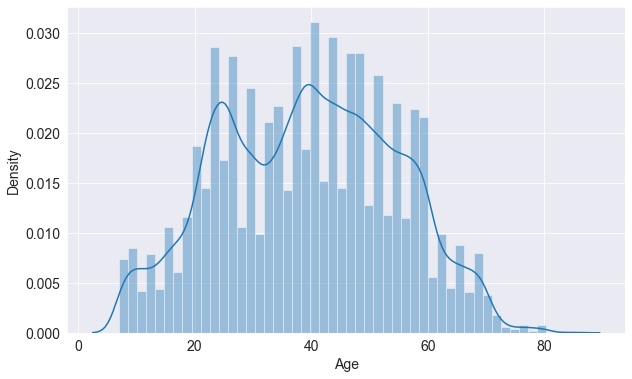

In [12]:
sns.distplot(df['Age']);

A majority of Passengers' age is between mid-age (20+ and 35+)

In [13]:
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

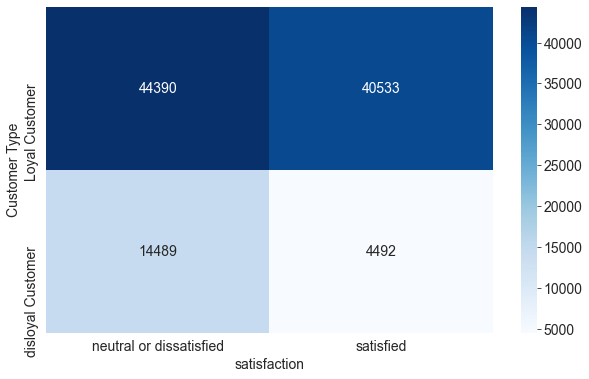

In [14]:
sns.heatmap(pd.crosstab(df['Customer Type'], df['satisfaction']),annot=True, cmap='Blues', cbar=True,fmt='d');


In [15]:
pd.crosstab(df['Customer Type'], df['satisfaction'], normalize=True)*100


satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,42.722128,39.010048
disloyal Customer,13.944603,4.323221


Here We have maximum amount of customer that are categorized as Loyal Customers out of which more than 50% are not satisfied

In [16]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


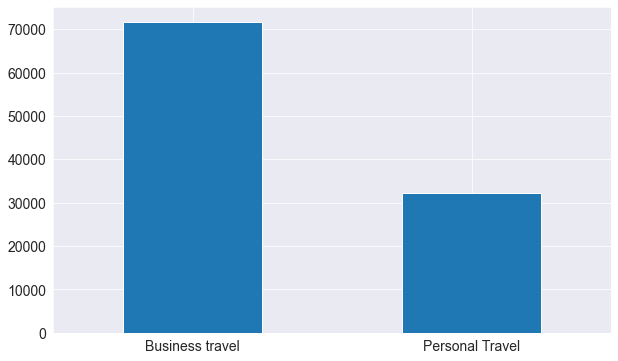

In [19]:
df['Type of Travel'].value_counts().plot(kind='bar');
plt.xticks(rotation='horizontal');

In [21]:
pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize=True)*100


satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,28.785225,40.177472
Personal Travel,27.881506,3.155798


- 69% of the travel was done for buisness out which 40% customer were satisfied

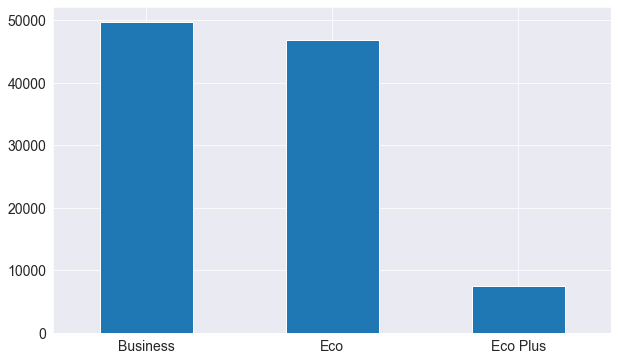

In [22]:
df['Class'].value_counts().plot(kind='bar');
plt.xticks(rotation='horizontal');

In [23]:
pd.crosstab(df['Class'], df['satisfaction'], normalize=True)*100

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,14.614452,33.184478
Eco,36.614567,8.374076
Eco Plus,5.437712,1.774715


* 50% passengers belong to Business Class, 50% belongs to Eco and Eco Plus Class.
* Majorlity of the customers belonging to Eco and Eco Plus are not satisfied with the services.
* However majority of the customers from Business Class are satisfied with the services.

In [30]:
rating_columns = [ "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", 
"Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", 
                    "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"]

In [24]:
def create_barChart(col,index):
    plt.subplot(5,3,index+1)
    sns.countplot(data=df, x=col , hue="satisfaction", palette="Paired")
    plt.title(col)
    plt.tight_layout()
    plt.legend()

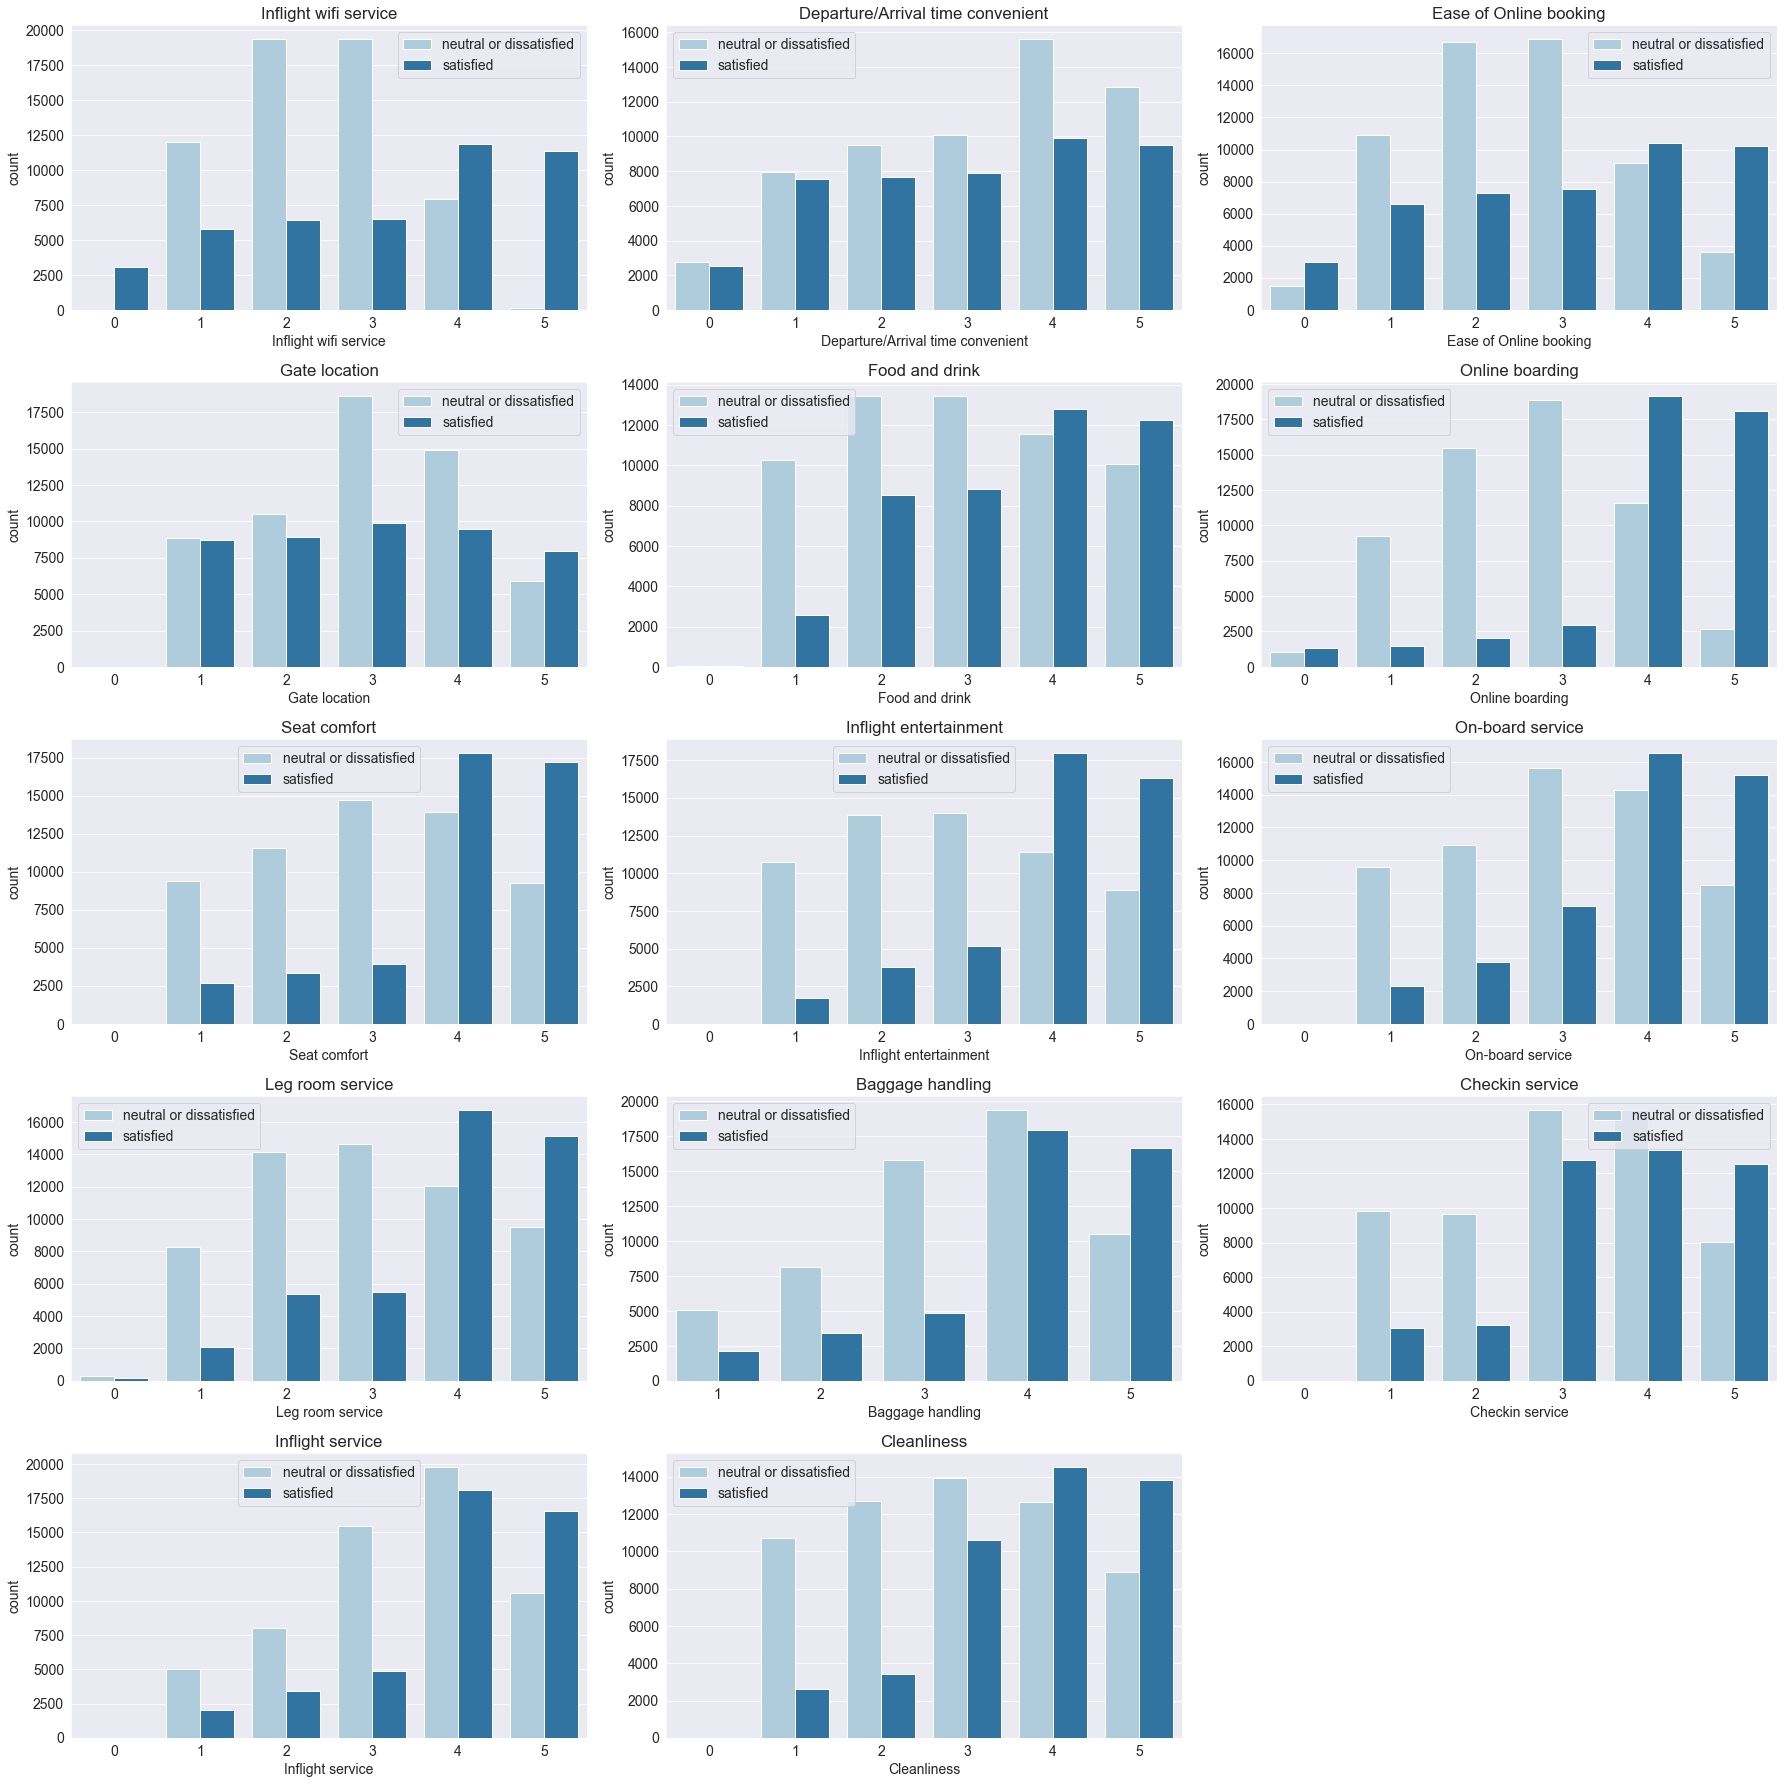

In [31]:
plt.figure(figsize=(25,25))
for index,col in enumerate(rating_columns):
    create_barChart(col,index)

##### From the graphs we see above we can see that most satisfied passengers gave high ratings to those features:

- cleanliness
- leg room service
- inflight entertaiment
- on-board service
- seat comfort
- online boarding
- Baggage handeling
##### While most disatisfied passengers gave higher ratings to these features:

- Departure/Arrival time conveince
##### On the other hand, disatisfied passengers gave low ratings to those features:

- Food and drinks
- leg room service
- inflight wifi service
- Ease of online booking

In [33]:
df["satisfaction"]=df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

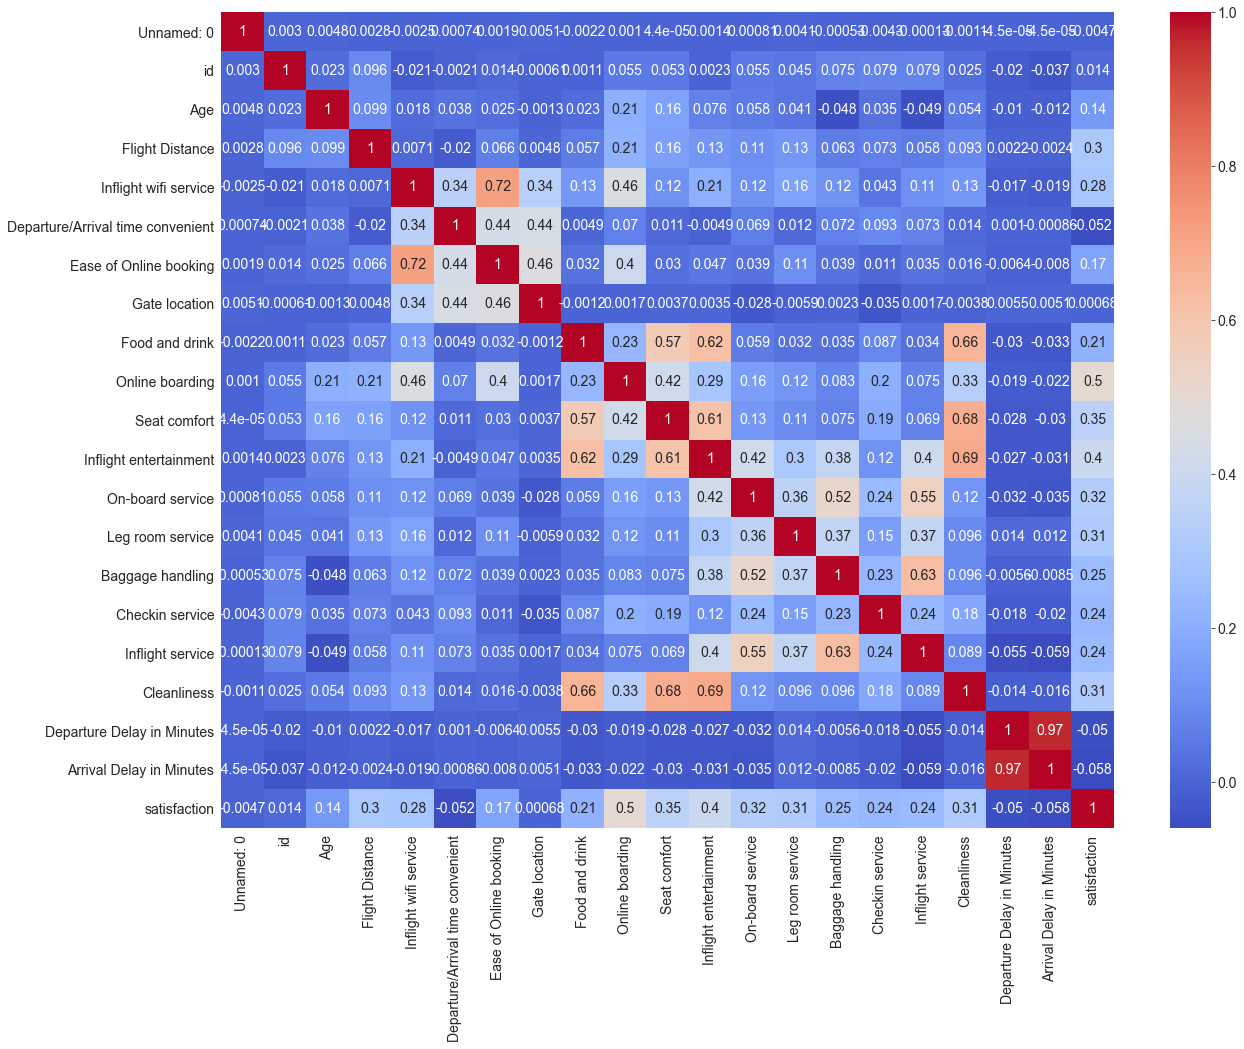

In [34]:
# Print heat map showing correlation between numeric variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.tight_layout